In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

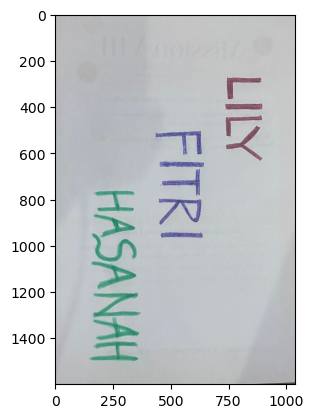

In [33]:
# Baca gambar dan ubah ke format RGB
img_source = cv2.imread("LILY_UTS.jpg")
img_rgb = cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB)

# Tampilkan gambar asli dan ubah ke grayscale
plt.imshow(img_rgb)
gray_img = cv2.cvtColor(img_source, cv2.COLOR_BGR2GRAY)

In [34]:
# Penyesuaian kontras dan kecerahan
contrast_factor = 1.5  
brightness_factor = 30    
adjusted_img = cv2.convertScaleAbs(img_source, alpha=contrast_factor, beta=brightness_factor)


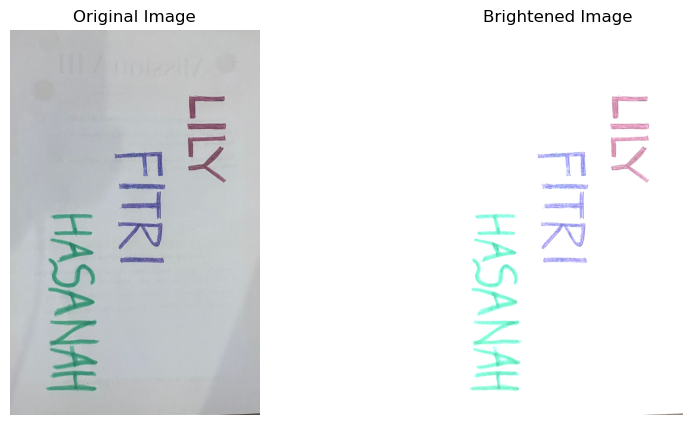

In [35]:
# Tampilkan gambar asli dan yang sudah disesuaikan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img_source, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Brightened Image')
plt.imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


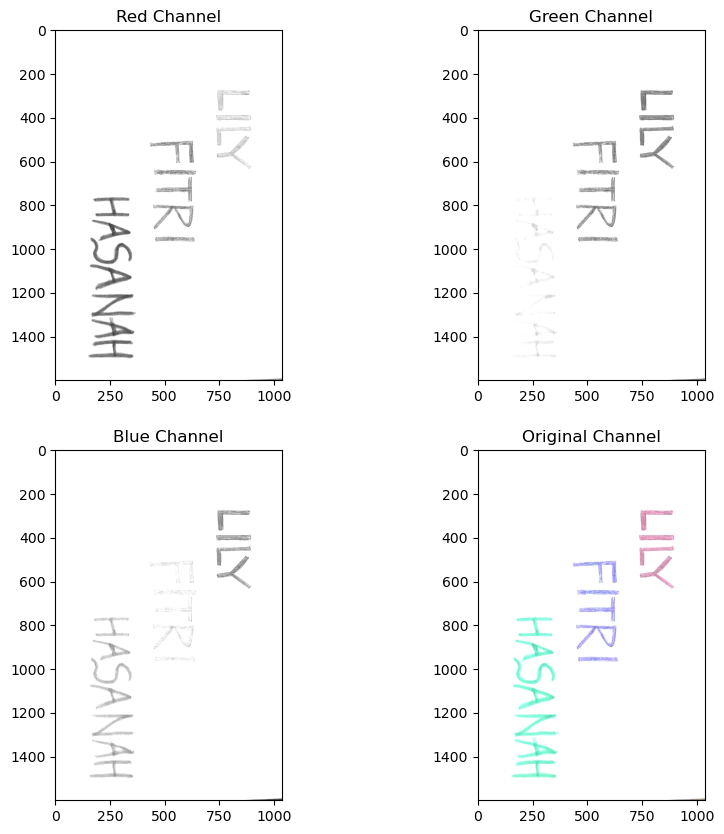

In [44]:
# Tampilkan saluran warna terpisah (RGB)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Saluran merah
red_channel = cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB)[:, :, 0]
axs[0, 0].imshow(red_channel, cmap="gray")
axs[0, 0].set_title('Red Channel')

# Saluran hijau
green_channel = cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB)[:, :, 1]
axs[0, 1].imshow(green_channel, cmap="gray")
axs[0, 1].set_title('Green Channel')

# Saluran biru
blue_channel = cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB)[:, :, 2]
axs[1, 0].imshow(blue_channel, cmap="gray")
axs[1, 0].set_title('Blue Channel')


# plt.subplot(2, 2, 1)
# plt.imshow(cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')


# Saluran kecerahan
original_channel = cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB)
axs[1, 1].imshow(original_channel)
axs[1, 1].set_title('Original Channel')

plt.show()



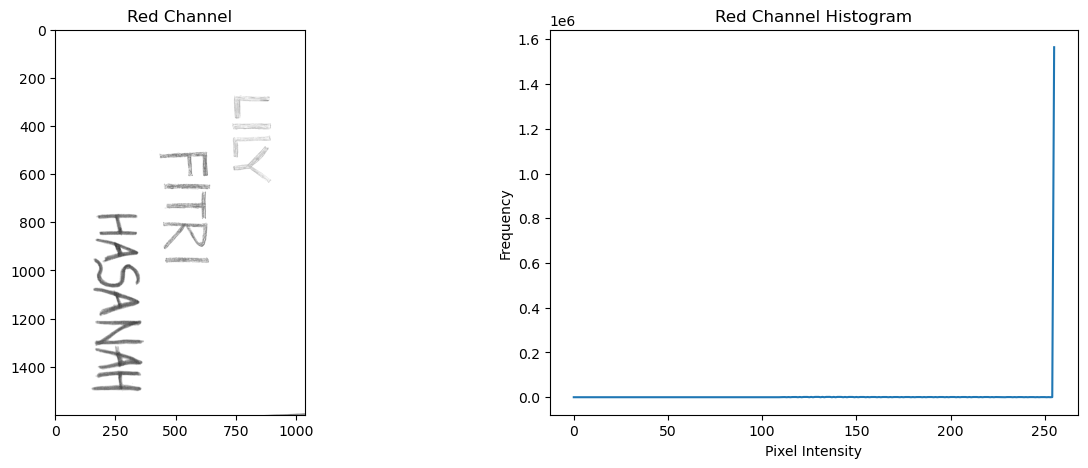

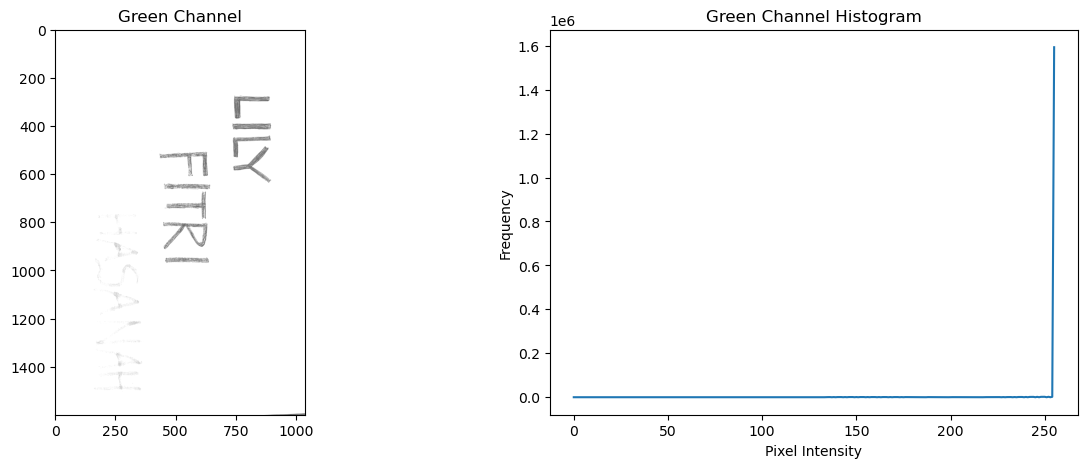

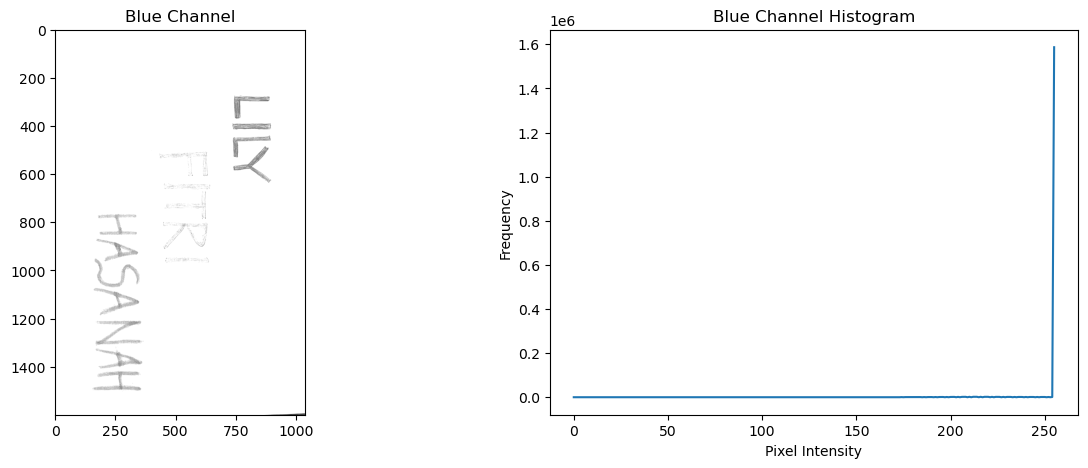

In [45]:


# Tampilkan histogram untuk setiap saluran warna
channels = [red_channel, green_channel, blue_channel]
colors = ['Red', 'Green', 'Blue']

for i, channel in enumerate(channels):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(channel, cmap='gray')
    plt.title(f'{colors[i]} Channel')
    
    plt.subplot(1, 2, 2)
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f'{colors[i]} Channel Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.show()


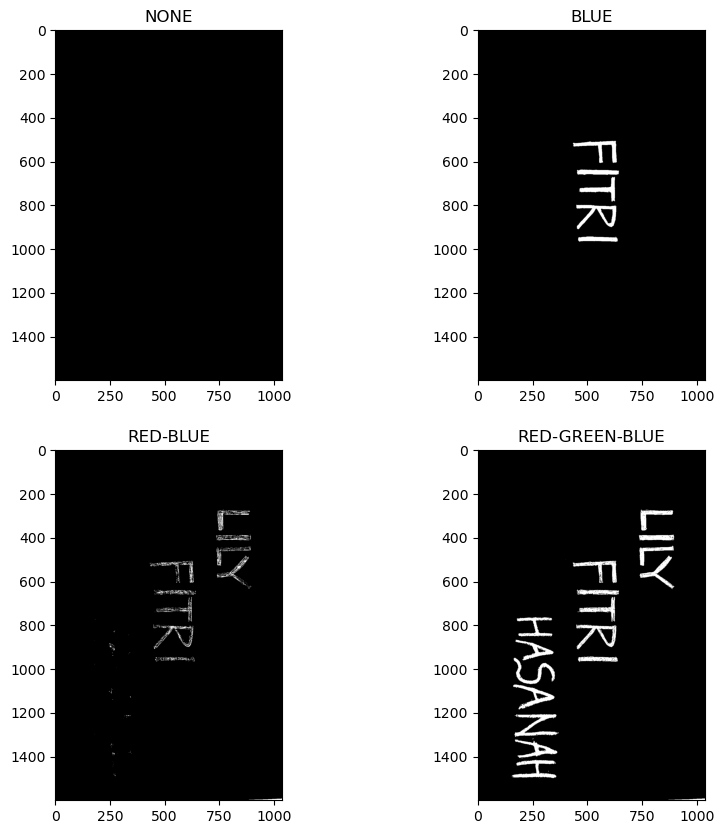

In [53]:
# Inisialisasi subplot untuk citra biner
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Ambang batas untuk mendapatkan citra biner (NONE)
(thresh, binary1) = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY)
axs[0, 0].imshow(binary1, cmap='gray')
axs[0, 0].set_title('NONE')
# Mask untuk warna biru dalam HSV
img_hsv = cv2.cvtColor(img_source, cv2.COLOR_BGR2HSV)
blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])
mask_blue = cv2.inRange(img_hsv, blue_lower, blue_upper)
axs[0, 1].imshow(mask_blue, cmap='gray')
axs[0, 1].set_title('BLUE')

# Ambang batas untuk mendapatkan citra biner (RED-BLUE)
(thresh, binary3) = cv2.threshold(gray_img, 95, 255, cv2.THRESH_BINARY)
axs[1, 0].imshow(binary3, cmap='binary')
axs[1, 0].set_title('RED-BLUE')

# Ambang batas untuk mendapatkan citra biner (RED-GREEN-BLUE)
(thresh, binary4) = cv2.threshold(gray_img, 140, 255, cv2.THRESH_BINARY)
axs[1, 1].imshow(binary4, cmap='binary')
axs[1, 1].set_title('RED-GREEN-BLUE')

plt.show()